# Images and matrix algebra in Python

The cbook library

https://matplotlib.org/stable/api/cbook_api.html

In [1]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

### 1. Open images with cbook:

To open images, we can use get_sample_data().

The image below was taken from:
 https://en.wikipedia.org/wiki/Cotopaxi#/media/File:Cotopaxi_volcano_2008-06-27T1322.jpg

In [2]:
# Put image into an object for which we need to provide the full path

image_file = cbook.get_sample_data("/Users/wladimir/Dropbox/Yachay_Tech/computational-physics-1/sample-data/M82.jpeg")

# Inspect the object

print(type(image_file))


<class '_io.BufferedReader'>


### 2. We can use imread() to read images:

In [3]:
# New image object:
image = plt.imread(image_file)

print(type(image))

print(image.shape)

<class 'numpy.ndarray'>
(1080, 1386, 3)


### 3. Identify the rasters

### The imshow() function

This function can be called to display data as an image on a 2D regular raster.

Image taken from: https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/raster_data.html


We notice we have a three-layered RGB image.

### 4. Represent full image:

plt.imshow()

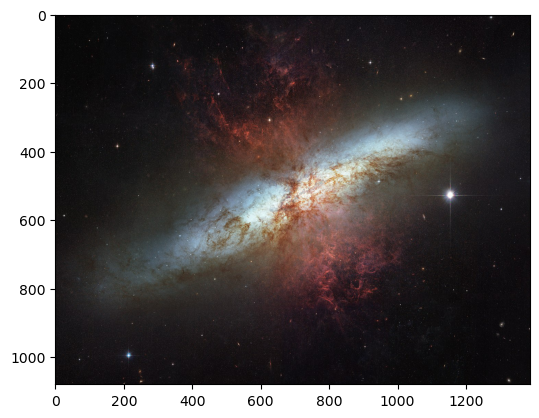

In [4]:
plt.figure()

plt.imshow(image)

plt.show()

### 5. See composition

#### How is an image composed?

An image is composed of several layers. In this case, RGB format, we have 3 layers.

R -> pixels can take values between 0, 255 (intensity)


B -> pixels can take values between 0, 255 (intensity)


G -> pixels can take values between 0, 255 (intensity)

In [5]:
print(image.shape)

(1080, 1386, 3)


In [6]:
# Use indexing:

imageR = image[:, :, 0]
imageG = image[:, :, 1]
imageB = image[:, :, 2]

print(imageR.shape, imageG.shape, imageB.shape)

(1080, 1386) (1080, 1386) (1080, 1386)


### 6. Plot the different colours:

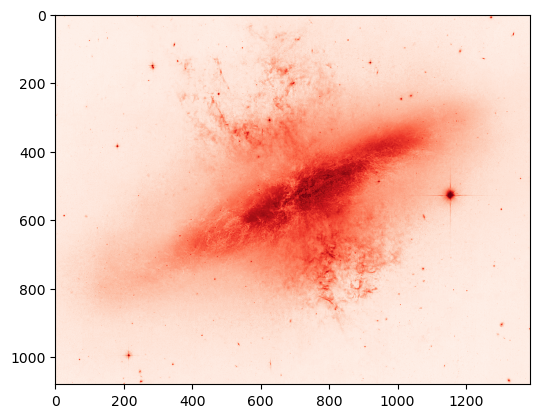

In [7]:
plt.figure()

plt.imshow(imageR, cmap = "Reds")

plt.show()

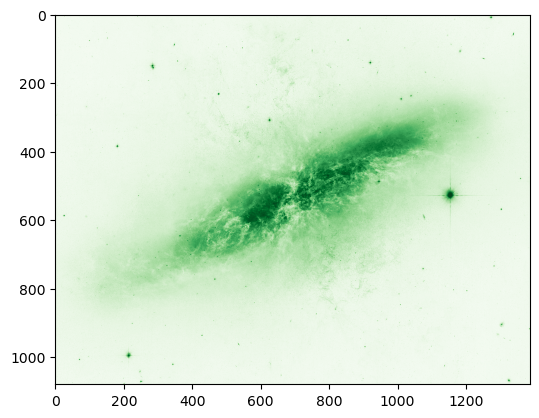

In [8]:
plt.figure()

plt.imshow(imageG, cmap = "Greens")

plt.show()

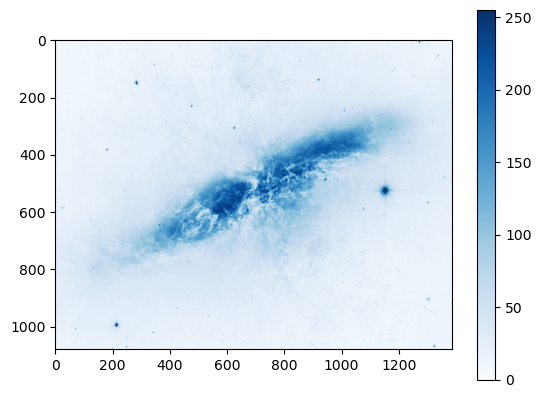

In [9]:
plt.figure()

plt.imshow(imageB, cmap = "Blues")
plt.colorbar()

plt.show()

### 7. Analyse individual layers

#### Important

- Images are layered matrices of the form ($m\times n$)!

- We can then use linear algebra and all sort of linear operations on them.

- Computationally speaking images are arrays.

In [10]:
import numpy as np

In [11]:
print(imageR.shape[0])
print(imageG.shape)
print(imageB.shape)

1080
(1080, 1386)
(1080, 1386)


In [12]:
print(type(imageR[0][0]))
print(type(imageG[0][0]))
print(type(imageB[0][0]))

<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [13]:
print(np.min(imageR), np.max(imageR))
print(np.min(imageG), np.max(imageG))
print(np.min(imageB), np.max(imageB))

0 255
0 255
0 255


In [14]:
# Get the total pixel count:
print(imageR.size)
print(imageG.size)
print(imageB.size)


1496880
1496880
1496880


## Surfaces:

In [15]:
# Create a meshgrid

x = np.linspace(0, imageR.shape[0], imageR.shape[0])
y = np.linspace(0, imageR.shape[1], imageR.shape[1])
print(x.shape, y.shape)

x_2d, y_2d = np.meshgrid(y, x)

print(x_2d.shape, y_2d.shape)

(1080,) (1386,)
(1080, 1386) (1080, 1386)


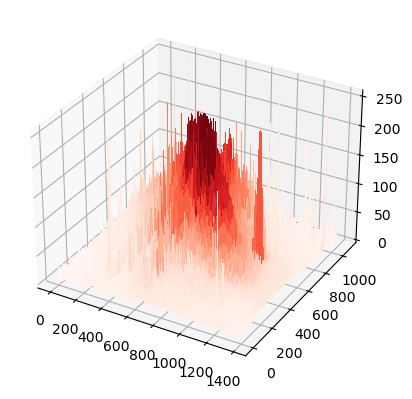

In [22]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d, y_2d, imageR, cmap = "Reds", antialiased=False)

plt.show()

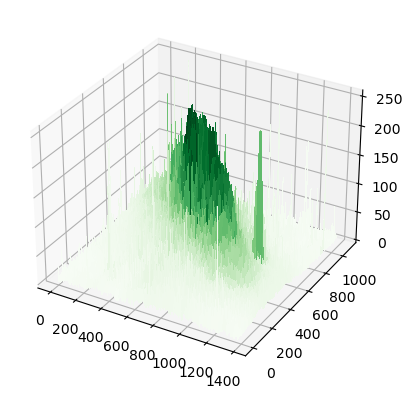

In [23]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d, y_2d, imageG, cmap = "Greens", antialiased=False)

plt.show()

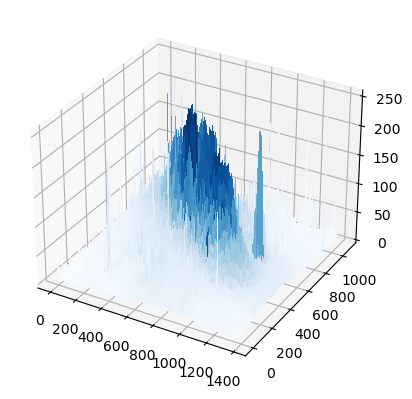

In [24]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d, y_2d, imageB, cmap = "Blues", antialiased=False)

plt.show()

### 8. Pixel histograms:

If we have 2D arrays, it is better to linearise them/reshape them into 1D arrays.


See documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [25]:
# Reshape them into 1D arrays (flatten)
imageR_1D = np.reshape(imageR, (imageR.size, 1))
imageB_1D = np.reshape(imageB, (imageB.size, 1))                   
imageG_1D = np.reshape(imageG, (imageG.size, 1))
                       
print(imageR_1D.shape, imageB_1D.shape, imageG_1D.shape)
                                     

(1496880, 1) (1496880, 1) (1496880, 1)


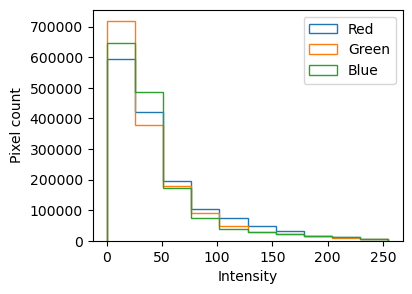

In [26]:
# Plotting some histograms

plt.figure(figsize=(4,3))
plt.hist(imageR_1D, histtype='step', label='Red')
plt.hist(imageG_1D, histtype='step', label='Green')
plt.hist(imageB_1D, histtype='step', label='Blue')
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

### Image manipulation:

#### Transpose:

In [27]:
imageR_transpose = imageR.T
#imageR_transpose = imageR.transpose()

print(imageR.shape, imageR_transpose.shape)

(1080, 1386) (1386, 1080)


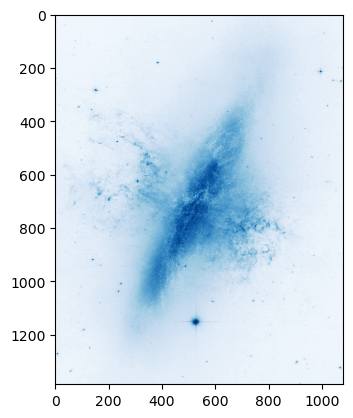

In [28]:
plt.figure()

plt.imshow(imageR_transpose, cmap = "Blues")

plt.show()

### Adding matrices:

In [31]:
sum_image = 0.1*imageR + imageG + imageB

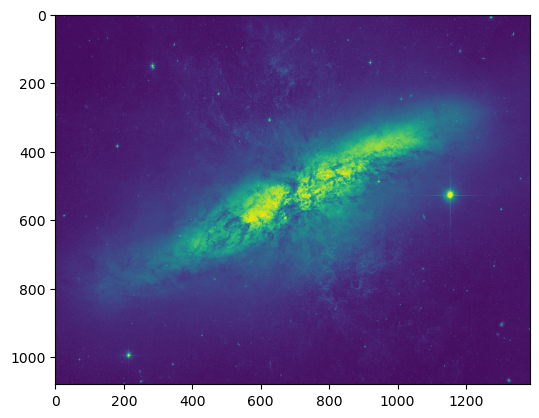

In [32]:
plt.figure()

plt.imshow(sum_image, cmap = "viridis")

plt.show()

#### Masking:

In [33]:
import matplotlib.patches as patches

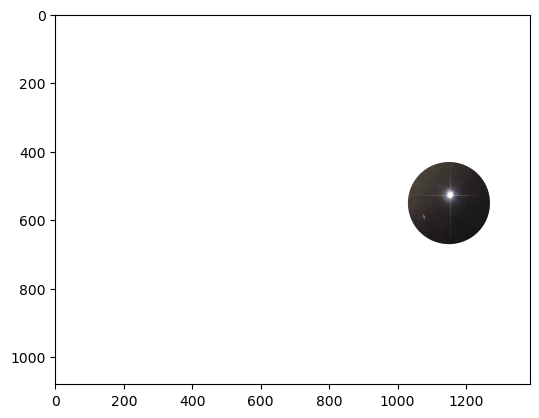

In [36]:
fig, ax = plt.subplots()

im = ax.imshow(image)

patch = patches.Circle((1150, 550), \
                       radius=120, transform=ax.transData)

im.set_clip_path(patch)

plt.show()

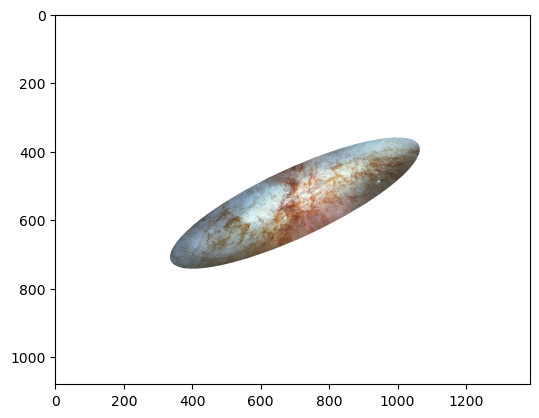

In [42]:
fig, ax = plt.subplots()

im = ax.imshow(image)

patch = patches.Ellipse((700, 550),width =800, height=200,\
                        angle=155.0, transform=ax.transData)

im.set_clip_path(patch)

plt.show()

### Atenuate colours:

In [48]:
# Divide intensities by 2:
imageB_at = imageB//2
imageR_at = imageR//2

# Flatten the array into 1D
imageB_at_1D = np.reshape(imageB_at, (imageB_at.size, 1))

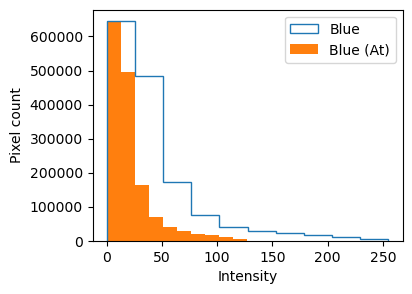

In [44]:
# Plotting some histograms

plt.figure(figsize=(4,3))
plt.hist(imageB_1D, histtype='step', label='Blue')
plt.hist(imageB_at_1D, label='Blue (At)')

plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

In [49]:
# New atenuated image
image_at = np.zeros((imageR.shape[0], imageR.shape[1], 3), dtype = int)
image_at2 = np.zeros((imageR.shape[0], imageR.shape[1], 3), dtype = int)

print(image_at.shape)

(1080, 1386, 3)


In [50]:
# Lets assing the layers:

image_at[:, :, 0] = imageR
image_at[:, :, 1] = imageG
image_at[:, :, 2] = imageB_at


# Lets assing the layers:

image_at2[:, :, 0] = imageR_at
image_at2[:, :, 1] = imageG
image_at2[:, :, 2] = imageB

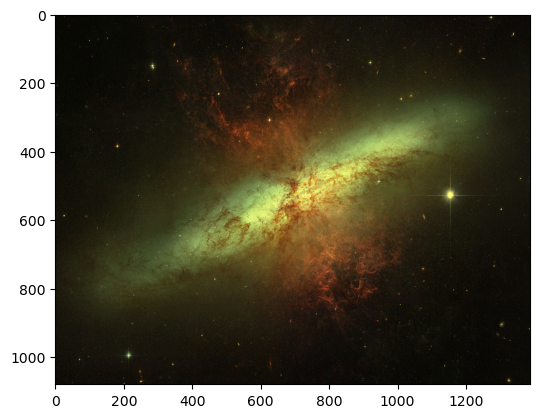

In [47]:
plt.figure()

plt.imshow(image_at)

plt.show()

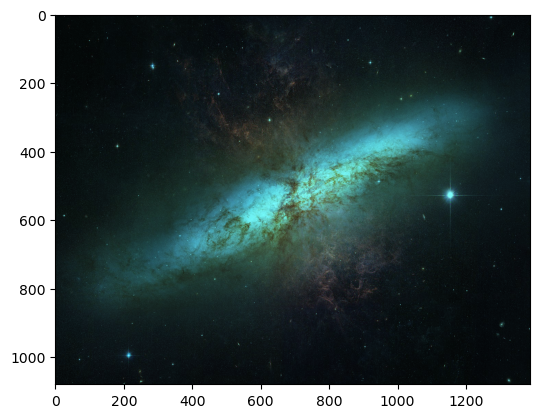

In [51]:
plt.figure()

plt.imshow(image_at2)

plt.show()